In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from scipy.stats import mode
%matplotlib inline

# Convolution Example
from https://www.khanacademy.org/math/differential-equations/laplace-transform/convolution-integral/v/introduction-to-the-convolution

In [3]:
# f = sin(t)
# g = cos(t)
# f*g = t/2(sin(t)) the convolution of f with g should be equal to this

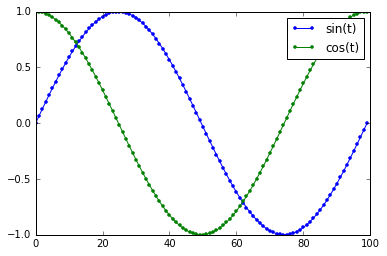

In [4]:
t = np.linspace(0, 2*np.pi, 100)
delta = mode(np.diff(t))[0][0]
f = np.sin(t)
g = np.cos(t)
plt.plot(f, '.-', label='sin(t)')
plt.plot(g, '.-', label='cos(t)')
plt.legend()

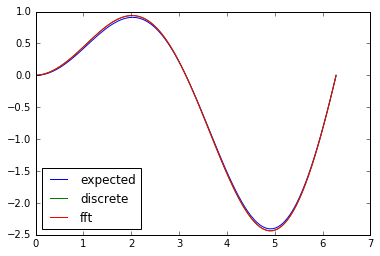

In [5]:
y_expected = t/2*np.sin(t)
y_numpy = np.convolve(f,g, 'full')*delta
y_fft = fftconvolve(f,g, 'full')*delta
plt.plot(t, y_expected[:100], label='expected')
plt.plot(t, y_numpy[:100], label='discrete')
plt.plot(t, y_fft[:100], label='fft')
plt.legend(loc='best')

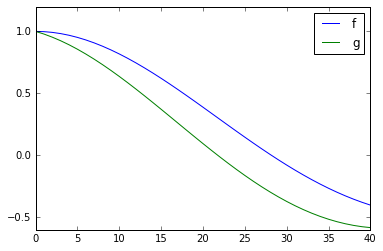

In [16]:
from statsmodels.tsa.stattools import acf, ccf
auto_f = acf(f)
auto_g = acf(g)
plt.plot(auto_f, label='f')
plt.plot(auto_g, label='g')
plt.legend()

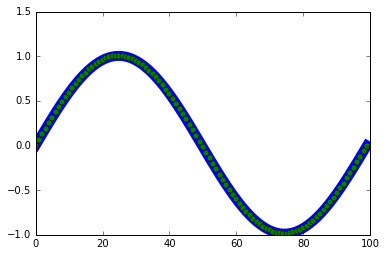

In [12]:
n = len(f)
xi = np.ones(n)
d = np.correlate(xi, xi, 'full')
plt.plot((np.correlate(f-f.mean(), g-g.mean(), 'full') / d)[n - 1:]/(np.std(f)*np.std(g)), lw=10)
plt.plot(ccf(f, g), 'o')